Here I attempt to create classifier by:
- over-sampling
- under-sampling
- smote (not sure about this because it creates artificial data)

imblance learning using library imbalanced learning

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import random

# something wrong with this pandas ml
#import pandas_ml as pdml
sns.set_context("poster")

from utils.machine_learning.data_loader import ml_load_species
from utils.machine_learning.trainer import MLClassifier, ml_trainer

# Brief Usage of Oversampling and undersampling

In [14]:
def plot_pie_chart(X_set, Y_set):
    
    hgt_count, no_hgt_count = 0, 0

    for label in Y_set:
        if label == 1:
            hgt_count +=1
        elif label == 0:
            no_hgt_count +=1
            
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    #plt.pie([hgt_count, no_hgt_count], labels = ['HGT', 'No HGT'], colors = colors, autopct='%.0f%%')
    plt.pie([hgt_count, no_hgt_count], labels = ['HGT', 'No HGT'], colors = colors, autopct=lambda x: '{:.0f}'.format(x*(Y_set.shape[0])/100))
    plt.show()

## Over-Sampling

The minority class is repeated to compensate the majority

133085


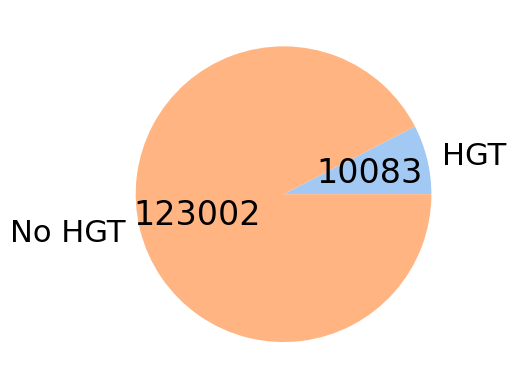

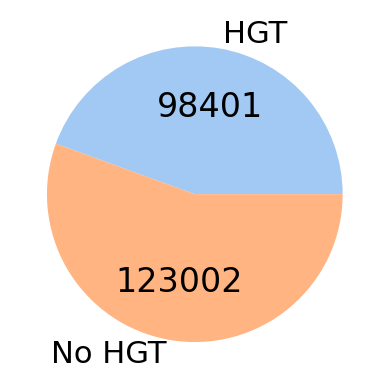

In [30]:
X_B_train, y_B_train = ml_load_species('all', 'B', 'train')
X_B_test, y_B_test = ml_load_species('all', 'B', 'test')
print(y_B_train.shape[0])

plot_pie_chart(X_B_train,y_B_train)

sampling_strategy = 0.8
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_B_train_ROS, y_B_train_ROS = ros.fit_resample(X_B_train, y_B_train)


plot_pie_chart(X_B_train_ROS,y_B_train_ROS)


In [31]:
# init model and init classifier
HGT_B_lgbm_ROS = MLClassifier(LGBMClassifier())

# train and eval
HGT_B_lgbm_ROS.train(X_B_train_ROS, y_B_train_ROS)
HGT_B_lgbm_ROS.eval(X_B_test, y_B_test)

Fitting Model
Done
[[49133  8081]
 [  716  4172]]
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     57214
         1.0       0.34      0.85      0.49      4888

    accuracy                           0.86     62102
   macro avg       0.66      0.86      0.70     62102
weighted avg       0.93      0.86      0.88     62102



## Undersampling

So now instead of oversampling we cut down the majority class

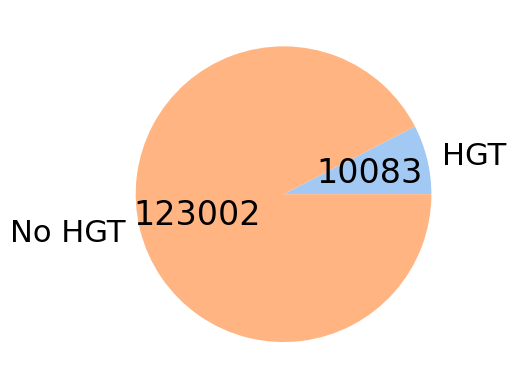

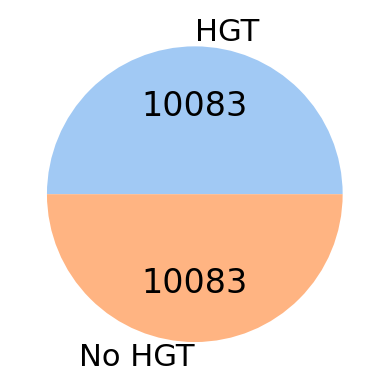

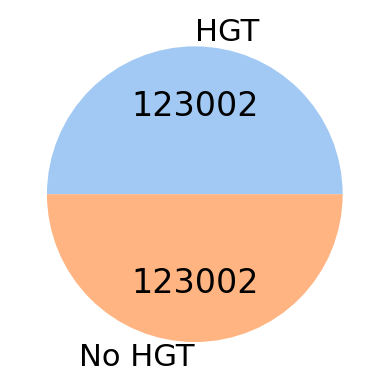

In [33]:
plot_pie_chart(X_B_train,y_B_train)

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_B_train_RUS_1, y_B_train_RUS_1 = rus.fit_resample(X_B_train, y_B_train)
plot_pie_chart(X_B_train_RUS_1,y_B_train_RUS_1)

# This is basically over sampling
sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_B_train_RUS_2, y_B_train_RUS_2 = ros.fit_resample(X_B_train, y_B_train)
plot_pie_chart(X_B_train_RUS_2,y_B_train_RUS_2)

In [34]:
# init model and init classifier
HGT_B_lgbm_RUS = MLClassifier(LGBMClassifier())

# train and eval
HGT_B_lgbm_RUS.train(X_B_train_RUS_1, y_B_train_RUS_1)
HGT_B_lgbm_RUS.eval(X_B_test, y_B_test)

Fitting Model
Done
[[47376  9838]
 [  513  4375]]
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     57214
         1.0       0.31      0.90      0.46      4888

    accuracy                           0.83     62102
   macro avg       0.65      0.86      0.68     62102
weighted avg       0.94      0.83      0.87     62102



# Under-Sampling NON-HGT

## Generate csv file

In [13]:
def undersample(dataframe):
    hgt_mean = int(len(dataframe[dataframe['HGT']==1])/52)
    
    count_dict = dataframe.groupby('Genome')['HGT'].value_counts().to_dict()
    
    for (genome, hgt) in count_dict:
        if hgt == 0:
            if count_dict[(genome, hgt)] > hgt_mean:
                difference = count_dict[(genome, hgt)] - hgt_mean
                #print(f'{genome} undersample {difference}')
                list_of_indices = dataframe[(dataframe["Genome"] == genome) & (dataframe["HGT"] == 0)].index.to_list()
                if not list_of_indices:
                    print(genome)
                else:
                    for i in range(difference):
                        if not list_of_indices: break
                        id = random.choice(list_of_indices)
                        dataframe.drop(id, inplace=True)
                        list_of_indices.remove(id)
    return dataframe


In [10]:
df_B_train = ml_load_species('all', 'B', 'train', drop_na=True,return_df=True,genome_info=True)
df_C_train = ml_load_species('all', 'C', 'train', drop_na=True,return_df=True,genome_info=True)
df_D_train = ml_load_species('all', 'D', 'train', drop_na=True,return_df=True,genome_info=True)
df_E_train = ml_load_species('all', 'E', 'train', drop_na=True,return_df=True,genome_info=True)

<Axes: xlabel='Genome,HGT'>

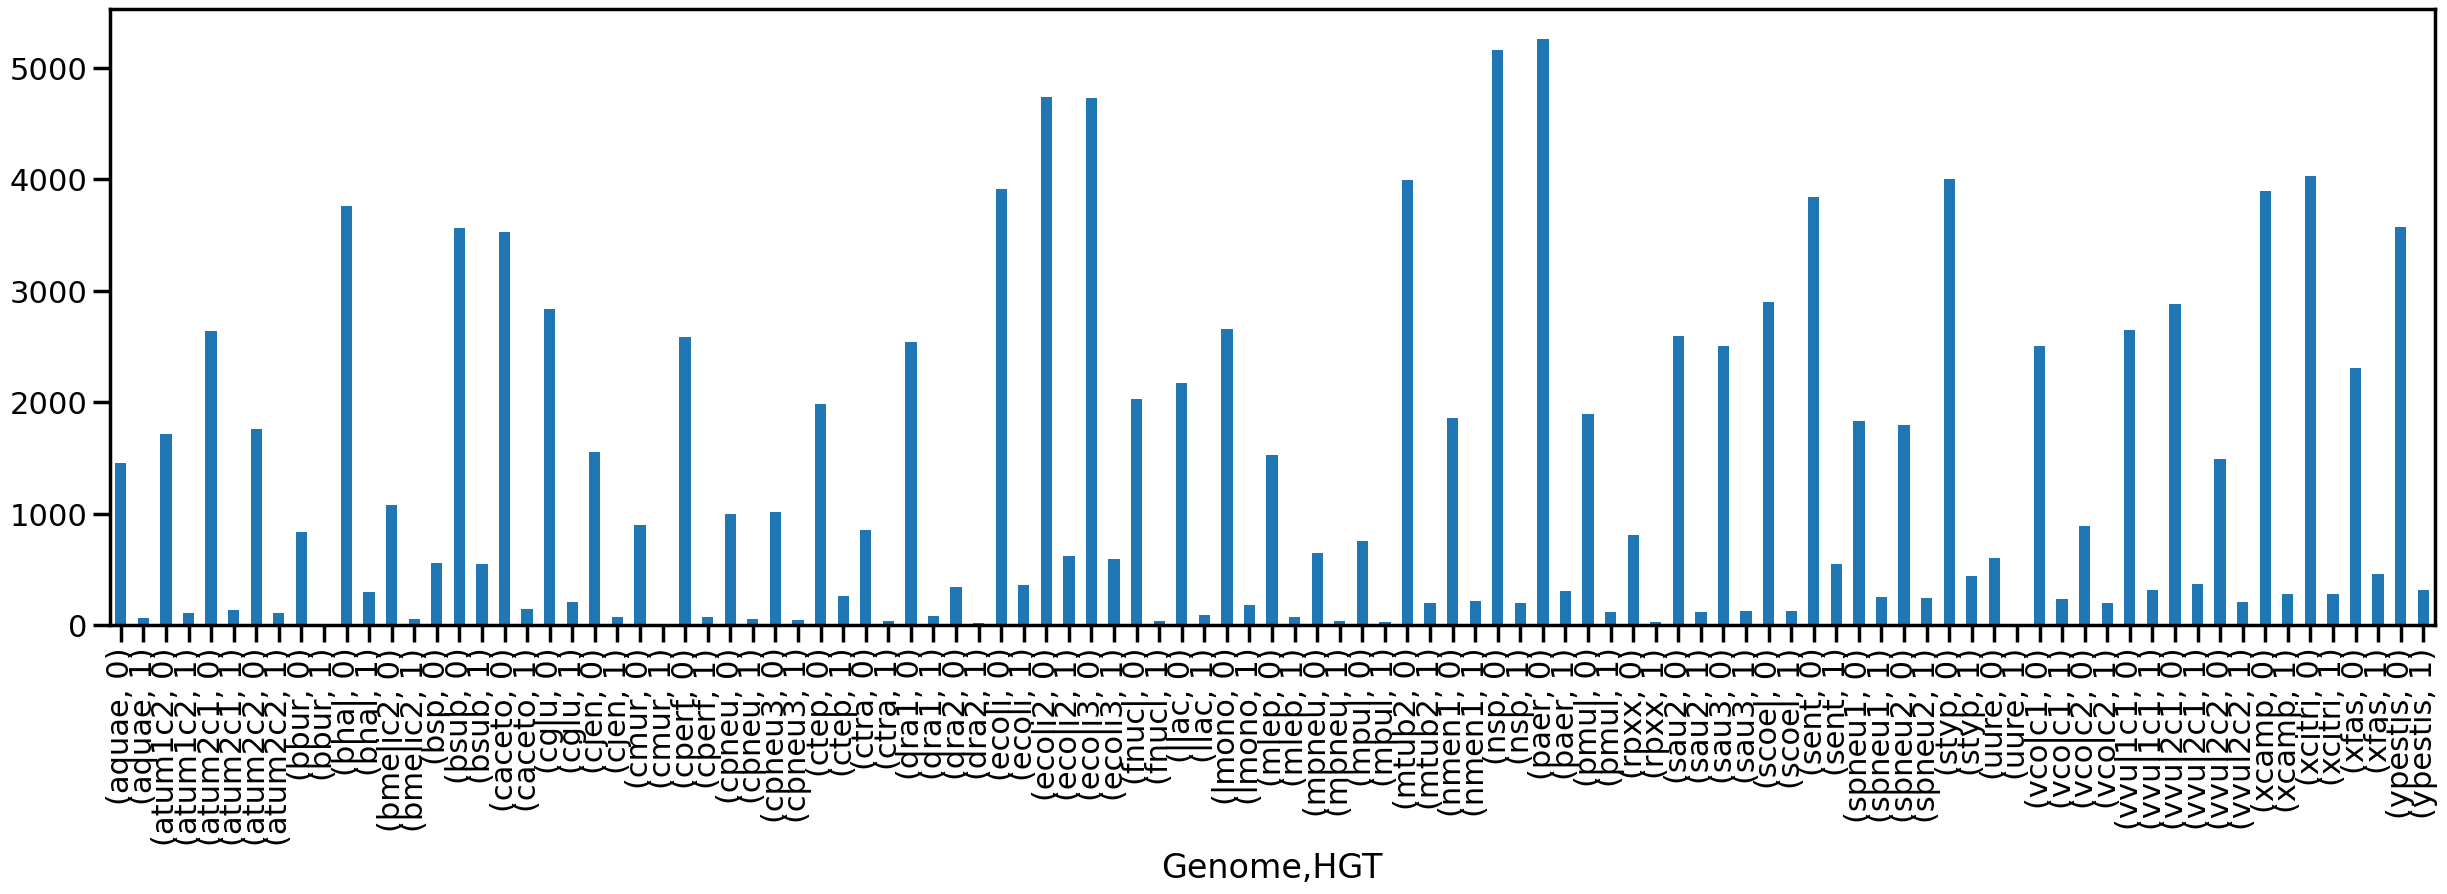

In [11]:
df_B_train.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

running the command below takes 1.5 hours!

In [15]:
df_B_train_undersampled = undersample(df_B_train)
df_C_train_undersampled = undersample(df_C_train)
df_D_train_undersampled = undersample(df_D_train)
df_E_train_undersampled = undersample(df_E_train)

<Axes: xlabel='Genome,HGT'>

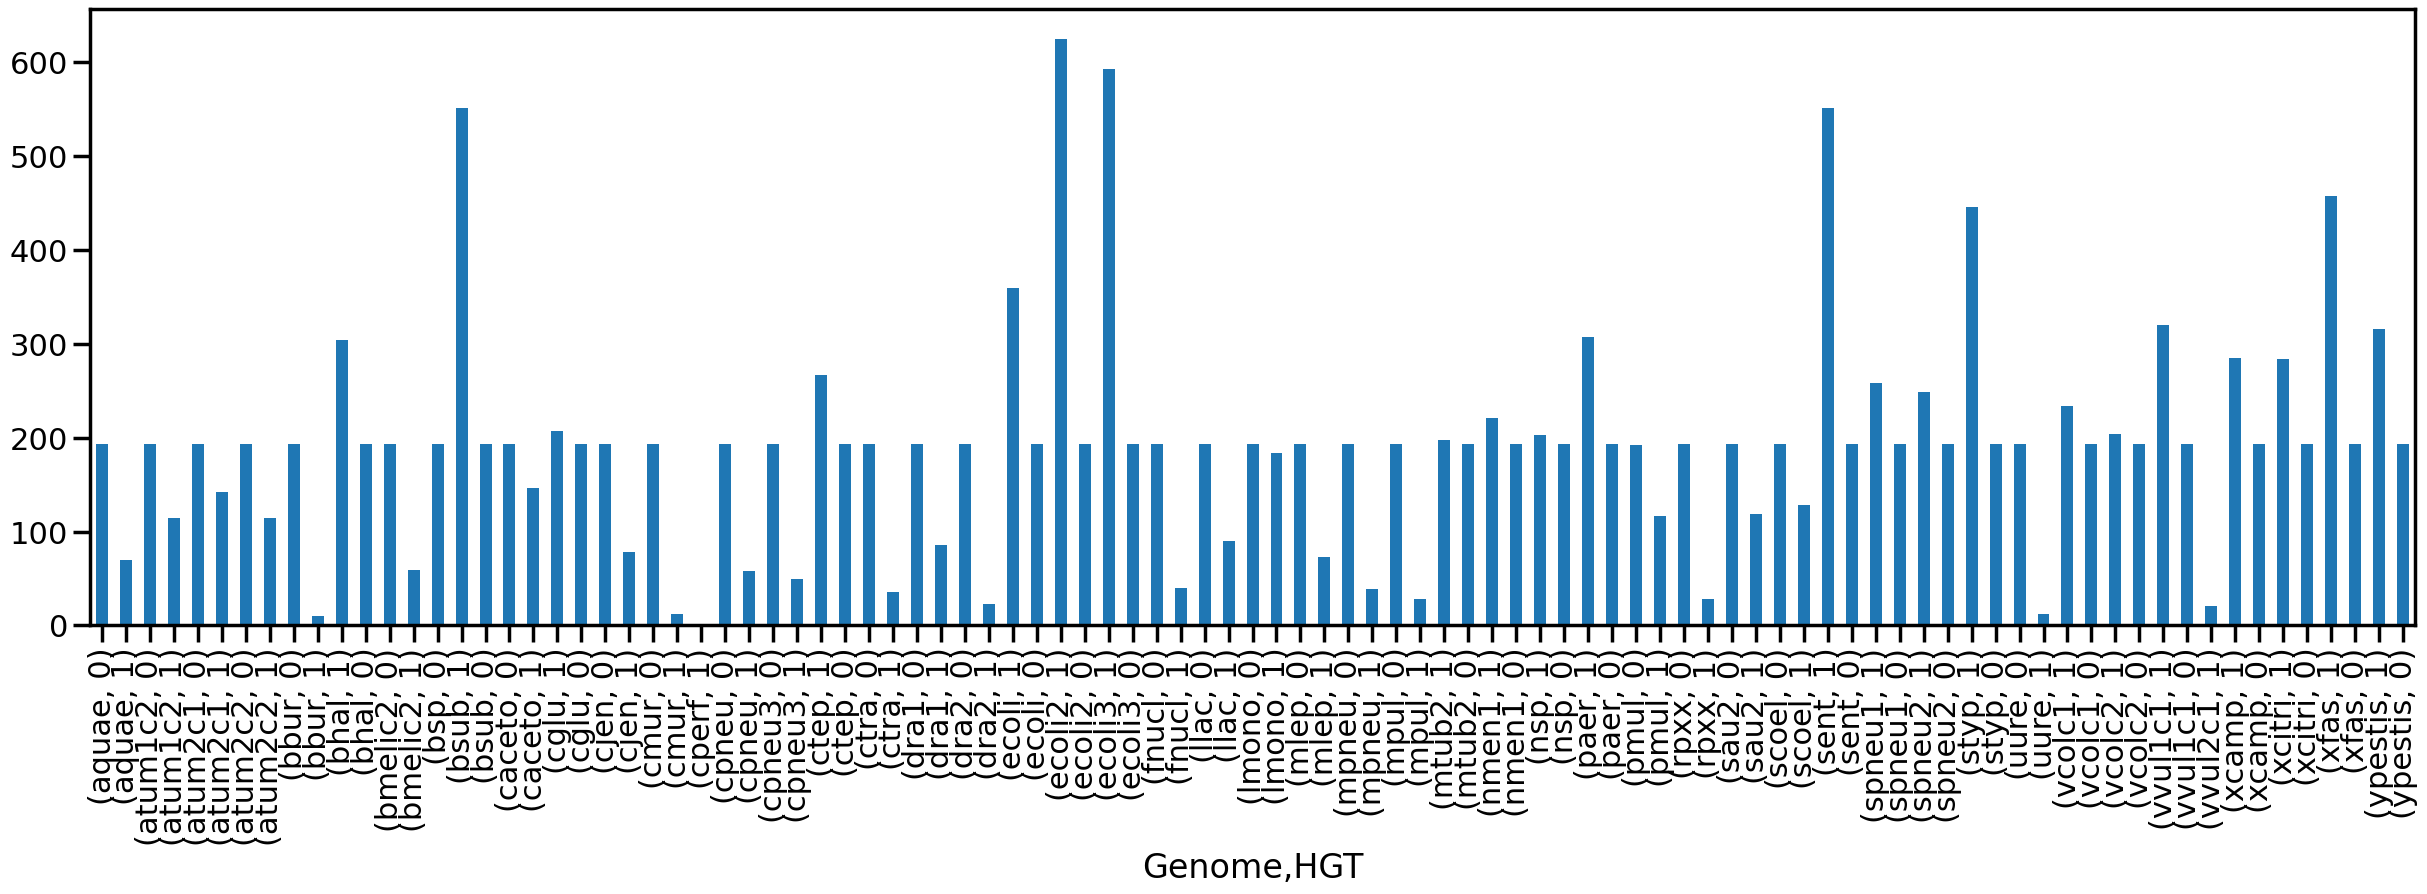

In [16]:
df_B_train_undersampled.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

<Axes: xlabel='Genome,HGT'>

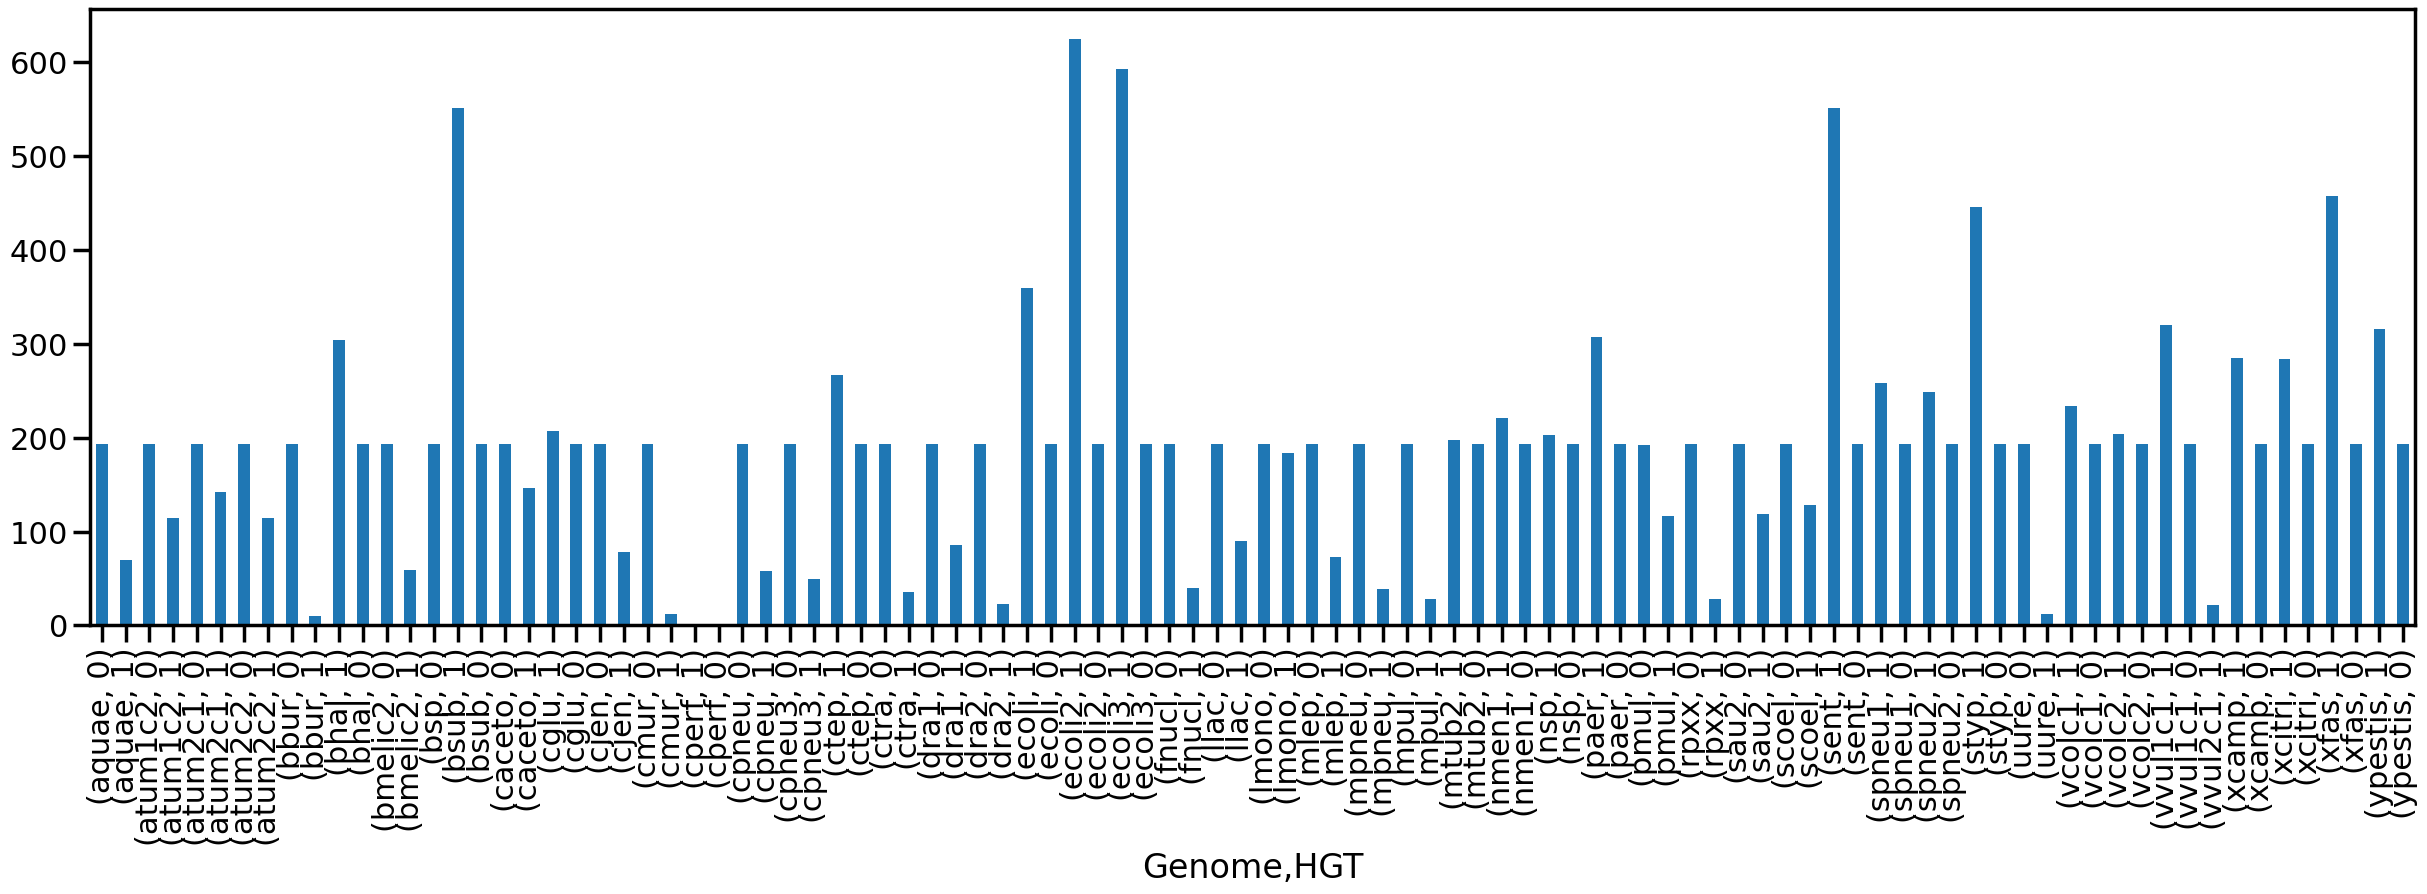

In [17]:
df_C_train_undersampled.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

<Axes: xlabel='Genome,HGT'>

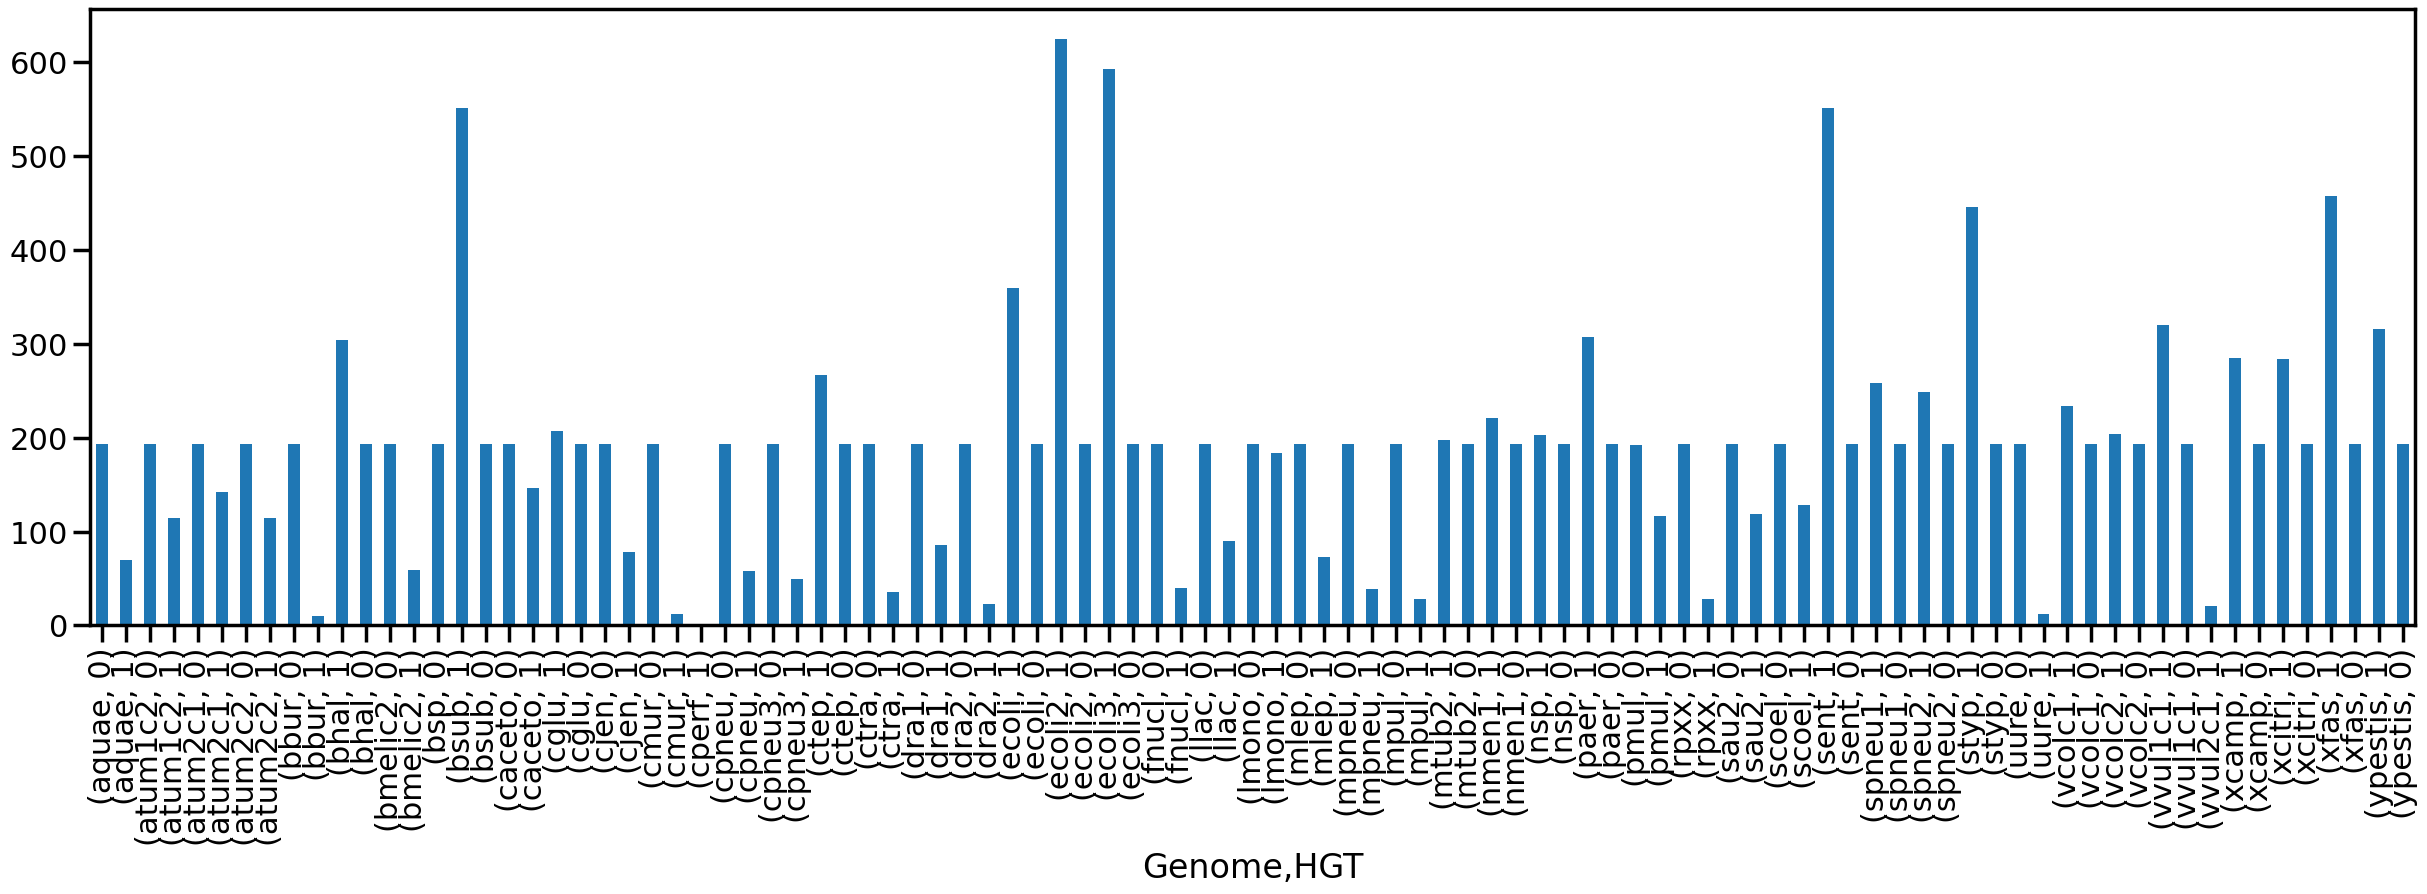

In [18]:
df_D_train_undersampled.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

<Axes: xlabel='Genome,HGT'>

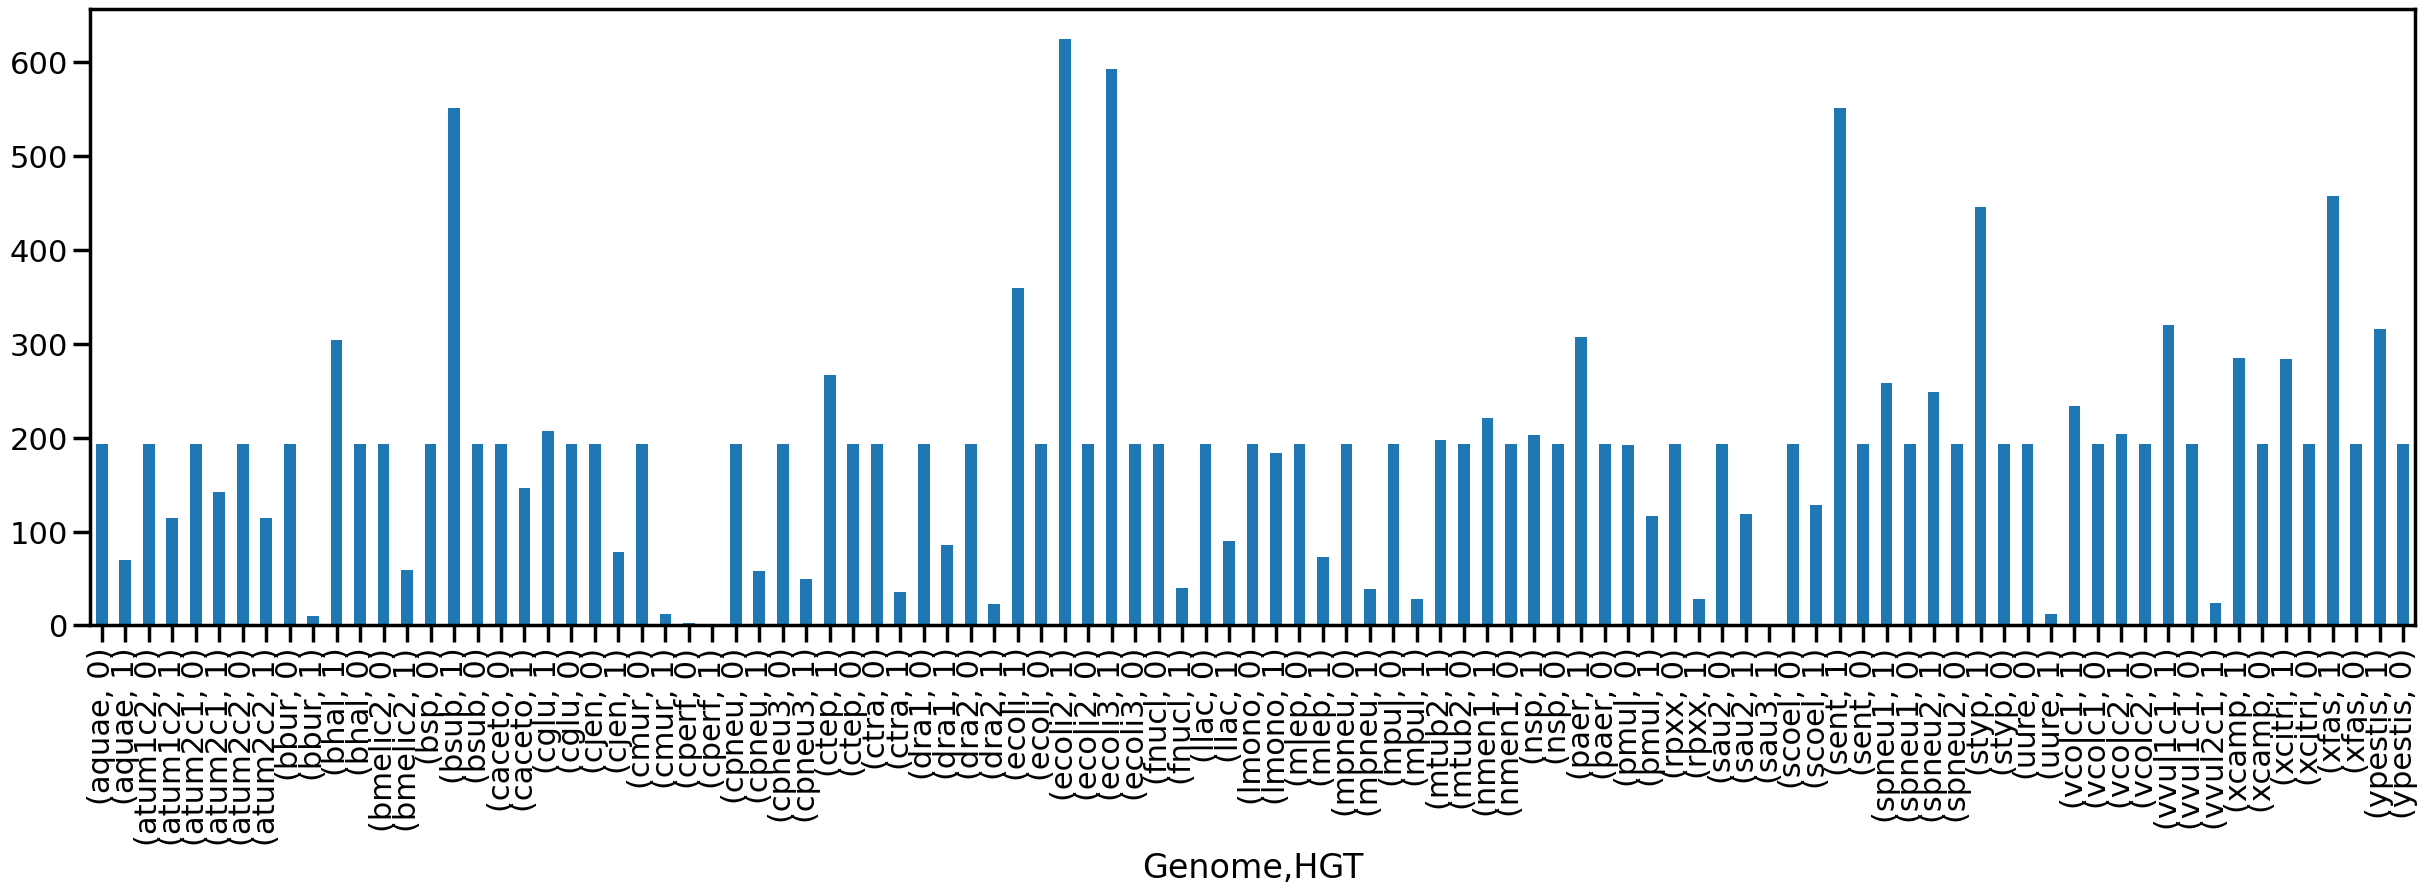

In [19]:
df_E_train_undersampled.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

In [20]:
df_B_train_undersampled.to_csv('B_train_undersample.csv')
df_C_train_undersampled.to_csv('C_train_undersample.csv')
df_D_train_undersampled.to_csv('D_train_undersample.csv')
df_E_train_undersampled.to_csv('E_train_undersample.csv')

## Load Generated File

In [33]:
df_B_train_undersampled = pd.read_csv('B_train_undersample.csv', index_col='ID')

In [34]:
df_B_train_undersampled

,Strand,Length,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,Genome
ID,,,,,,,,,,,,,,
BB0015,1.0,621,41.8,0.8,30.3,0.5,20.2,-0.2,30.8,0.6,97.4,1,0,bbur
BB0016,1.0,375,33.3,-0.7,27.0,-0.2,26.2,2.0,28.8,0.0,151.4,1,0,bbur
BB0018,1.0,1008,35.9,-0.2,27.3,-0.1,19.9,-0.3,27.7,-0.3,70.7,1,0,bbur
BB0021,1.0,645,32.9,-0.7,29.2,0.2,22.7,0.7,28.2,-0.1,75.3,1,0,bbur
BB0026,1.0,924,40.8,0.6,29.1,0.2,26.5,2.2,32.1,1.0,124.8,1,0,bbur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP858,1.0,1905,47.2,1.1,30.3,-0.2,18.9,0.2,32.1,0.6,38.7,1,0,rpxx
RP862,1.0,396,38.3,-0.4,39.1,1.7,20.3,0.6,32.6,0.7,159.2,1,0,rpxx
RP870,0.0,660,25.3,-2.7,28.1,-0.7,23.1,1.5,25.5,-1.4,96.0,1,0,rpxx


In [36]:
df_B_train_undersampled = pd.read_csv('B_train_undersample.csv', index_col='ID')
df_C_train_undersampled = pd.read_csv('C_train_undersample.csv', index_col='ID')
df_D_train_undersampled = pd.read_csv('D_train_undersample.csv', index_col='ID')
df_E_train_undersampled = pd.read_csv('E_train_undersample.csv', index_col='ID')
df_B_train_undersampled.drop(columns='Genome', inplace=True)
df_C_train_undersampled.drop(columns='Genome', inplace=True)
df_D_train_undersampled.drop(columns='Genome', inplace=True)
df_E_train_undersampled.drop(columns='Genome', inplace=True)
df_B_train_undersampled = df_B_train_undersampled.values
df_C_train_undersampled = df_C_train_undersampled.values
df_D_train_undersampled = df_D_train_undersampled.values
df_E_train_undersampled = df_E_train_undersampled.values
X_B_train_undersampled, y_B_train_undersampled = df_B_train_undersampled[:,0:-1], df_B_train_undersampled[:,-1]
X_C_train_undersampled, y_C_train_undersampled = df_C_train_undersampled[:,0:-1], df_C_train_undersampled[:,-1]
X_D_train_undersampled, y_D_train_undersampled = df_D_train_undersampled[:,0:-1], df_D_train_undersampled[:,-1]
X_E_train_undersampled, y_E_train_undersampled = df_E_train_undersampled[:,0:-1], df_E_train_undersampled[:,-1]
print(X_B_train_undersampled.shape)
print(y_B_train_undersampled.shape)

(18579, 12)
(18579,)


## Load Test 

In [37]:
X_B_test, y_B_test = ml_load_species('all', 'B', 'test', drop_na=True)
X_C_test, y_C_test = ml_load_species('all', 'C', 'test', drop_na=True)
X_D_test, y_D_test = ml_load_species('all', 'D', 'test', drop_na=True)
X_E_test, y_E_test = ml_load_species('all', 'E', 'test', drop_na=True)
print(X_B_test.shape)

(62102, 12)


## LightGBM

results in a similar way when you weight samples!

In [39]:
# init model and init classifier
HGT_B_undersampled_lgbm = MLClassifier(LGBMClassifier())

# train and eval
HGT_B_undersampled_lgbm.train(X_B_train_undersampled, y_B_train_undersampled)
HGT_B_undersampled_lgbm.eval(X_B_test, y_B_test)
HGT_B_undersampled_lgbm.get_precision(X_B_test, y_B_test)
HGT_B_undersampled_lgbm.get_roc_auc(X_B_test, y_B_test)

[[47684  9530]
 [  605  4283]]
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     57214
         1.0       0.31      0.88      0.46      4888

    accuracy                           0.84     62102
   macro avg       0.65      0.85      0.68     62102
weighted avg       0.93      0.84      0.87     62102

prec: 0.3100702237023094
roc_auc: 0.9296159390703419


below is weighted class + undersampling

In [40]:
# init model and init classifier
HGT_B_undersampled_weighted_class_lgbm = MLClassifier(LGBMClassifier(is_unbalance=True))

# train and eval
HGT_B_undersampled_weighted_class_lgbm.train(X_B_train_undersampled, y_B_train_undersampled)
HGT_B_undersampled_weighted_class_lgbm.eval(X_B_test, y_B_test)
HGT_B_undersampled_weighted_class_lgbm.get_precision(X_B_test, y_B_test)
HGT_B_undersampled_weighted_class_lgbm.get_roc_auc(X_B_test, y_B_test)

[[47773  9441]
 [  596  4292]]
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     57214
         1.0       0.31      0.88      0.46      4888

    accuracy                           0.84     62102
   macro avg       0.65      0.86      0.68     62102
weighted avg       0.93      0.84      0.87     62102

prec: 0.3125318575693585
roc_auc: 0.9292984218894611


# Stratification using both over sampling and under sampling
Idea is to stratify folds from CV experiments. 

get avg amount of non hgts and hgts and then over sample them to the average!

In [3]:
df_B = ml_load_species('all', 'B', None, drop_na=True,return_df=True,genome_info=True)
df_C = ml_load_species('all', 'C', None, drop_na=True,return_df=True,genome_info=True)
df_D = ml_load_species('all', 'D', None, drop_na=True,return_df=True,genome_info=True)
df_E = ml_load_species('all', 'E', None, drop_na=True,return_df=True,genome_info=True)
print(df_B)
print(df_C)
print(df_D)
print(df_E)

        Strand  Length   GC1  SD1   GC2  SD2   GC3  SD3   GCT  SDT    Mah   
ID                                                                          
BB0001     0.0     570  22.5 -2.5  27.7 -0.1  18.8 -0.7  23.0 -1.6  149.6  \
BB0002     1.0    1026  36.2 -0.2  29.4  0.3  17.8 -1.1  27.8 -0.2   57.5   
BB0003     1.0    1362  35.8 -0.3  29.0  0.2  20.7  0.0  28.5  0.0   54.7   
BB0004     0.0    1791  33.8 -0.6  26.6 -0.3  20.4 -0.1  26.9 -0.5   34.9   
BB0005     1.0    1059  41.8  0.8  30.5  0.5  25.1  1.6  32.5  1.1   60.0   
...        ...     ...   ...  ...   ...  ...   ...  ...   ...  ...    ...   
TP1037     1.0     714  53.1 -1.4  43.1 -0.1  52.3 -0.4  49.5 -0.8   79.0   
TP1038     1.0     531  59.0 -0.2  41.6 -0.4  51.7 -0.5  50.7 -0.5  102.5   
TP1039     0.0     570  63.4  0.6  41.9 -0.3  55.0  0.1  53.4  0.1   84.2   
TP1040     1.0    1053  61.9  0.3  41.5 -0.4  53.1 -0.2  52.2 -0.2   52.8   
TP1041     1.0     711  54.6 -1.1  40.8 -0.5  47.1 -1.2  47.5 -1.3   50.1   

<Axes: xlabel='Genome,HGT'>

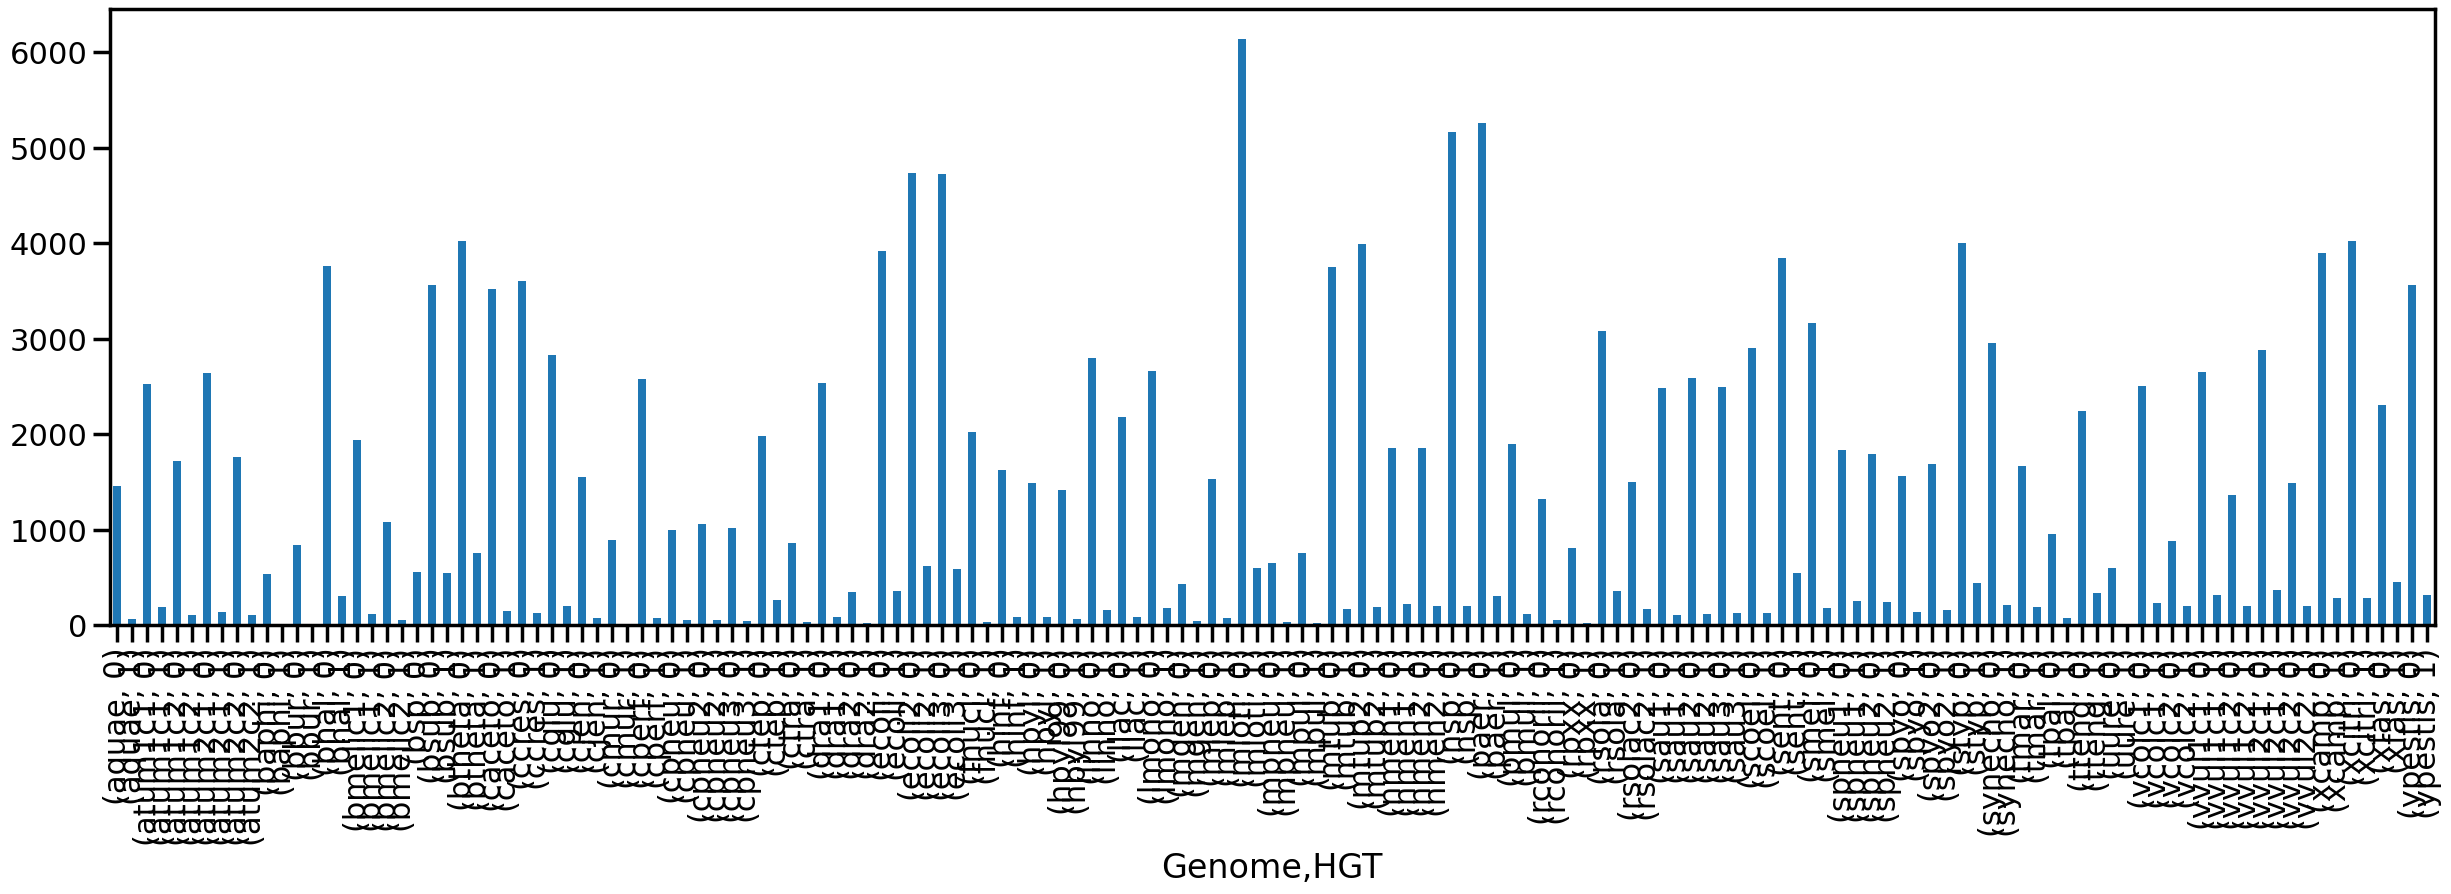

In [3]:
df_B.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

genomes where counts are less then 100... it shows that the lowest amounnt we have is 6 instances of HGT in baphi

In [4]:
df_B.groupby('Genome')['HGT'].value_counts()[df_B.groupby('Genome')['HGT'].value_counts() < 100]

Genome    HGT
aquae     1      70
baphi     1       6
bbur      1      10
bmelic2   1      59
cjen      1      78
cmur      1      12
cperf     1      75
cpneu     1      58
cpneu2    1      55
cpneu3    1      49
ctra      1      36
dra1      1      86
dra2      1      23
fnucl     1      40
hinf      1      87
hpyl      1      87
hpyl99    1      68
llac      1      90
mgen      1      51
mlep      1      73
mpneu     1      39
mpul      1      28
rconorii  1      54
rpxx      1      28
tpal      1      78
uure      1      12
Name: count, dtype: int64

get all value counts for non hgt

In [5]:
print(len(df_B[df_B['HGT']==0])/78)

2310.397435897436


In [5]:
df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()>2310]

Genome   HGT
atum1c1  0      2527
atum2c1  0      2643
bhal     0      3762
bsub     0      3559
btheta   0      4025
caceto   0      3526
ccres    0      3602
cglu     0      2833
cperf    0      2585
dra1     0      2542
ecoli    0      3917
ecoli2   0      4736
ecoli3   0      4731
linno    0      2804
lmono    0      2662
mloti    0      6142
mtub     0      3751
mtub2    0      3990
nsp      0      5163
paer     0      5260
rsola    0      3084
sau1     0      2489
sau2     0      2595
sau3     0      2501
scoel    0      2902
sent     0      3844
smel     0      3162
styp     0      4005
synecho  0      2956
vcolc1   0      2508
vvul1c1  0      2652
vvul2c1  0      2885
xcamp    0      3896
xcitri   0      4028
ypestis  0      3569
Name: count, dtype: int64

In [7]:
print(len(df_B[df_B['HGT']==1])/78)

191.93589743589743


In [8]:
df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()<191]

Genome    HGT
aquae     1       70
atum1c2   1      114
atum2c1   1      142
atum2c2   1      114
baphi     1        6
bbur      1       10
bmelic1   1      118
bmelic2   1       59
caceto    1      146
ccres     1      135
cjen      1       78
cmur      1       12
cperf     1       75
cpneu     1       58
cpneu2    1       55
cpneu3    1       49
ctra      1       36
dra1      1       86
dra2      1       23
fnucl     1       40
hinf      1       87
hpyl      1       87
hpyl99    1       68
linno     1      164
llac      1       90
lmono     1      184
mgen      1       51
mlep      1       73
mpneu     1       39
mpul      1       28
mtub      1      176
pmul      1      117
rconorii  1       54
rpxx      1       28
rsolac2   1      172
sau1      1      105
sau2      1      119
sau3      1      131
scoel     1      128
smel      1      179
spyo      1      136
spyo2     1      157
tpal      1       78
uure      1       12
Name: count, dtype: int64

Real stuff

In [4]:
import random

In [5]:
df_B = ml_load_species('all', 'B', None, drop_na=True,return_df=True,genome_info=True)
non_hgt_mean = int(len(df_B[df_B['HGT']==0])/78)
hgt_mean = int(len(df_B[df_B['HGT']==1])/78)

# Assume always HGT is minority
print(non_hgt_mean)
print(hgt_mean)

# select genome to over sample
df_B_genome_to_over_sample_hgt = pd.DataFrame(df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()<hgt_mean])
df_B_genome_to_over_sample_non_hgt = pd.DataFrame(df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()<non_hgt_mean])
list_of_genome_to_over_sample_hgt = df_B_genome_to_over_sample_hgt.index.to_list()
list_of_genome_to_over_sample_non_hgt = df_B_genome_to_over_sample_non_hgt.index.to_list()

# select genome to under sample
df_B_genome_to_under_sample_hgt = pd.DataFrame(df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==1].groupby('Genome')['HGT'].value_counts()>hgt_mean])
df_B_genome_to_under_sample_non_hgt = pd.DataFrame(df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()[df_B[df_B['HGT']==0].groupby('Genome')['HGT'].value_counts()>non_hgt_mean])
list_of_genome_to_under_sample_hgt = df_B_genome_to_under_sample_hgt.index.to_list()
list_of_genome_to_under_sample_non_hgt = df_B_genome_to_under_sample_non_hgt.index.to_list()

2310
191


In [6]:
df_B = ml_load_species('all', 'B', None, drop_na=True,return_df=True,genome_info=True)
non_hgt_mean = int(len(df_B[df_B['HGT']==0])/78)
hgt_mean = int(len(df_B[df_B['HGT']==1])/78)

# Assume always HGT is minority
print(non_hgt_mean)
print(hgt_mean)

2310
191


In [7]:
count_dict = df_B.groupby('Genome')['HGT'].value_counts().to_dict()

In [8]:
for (genome, hgt) in count_dict:
    if hgt == 0:
        if count_dict[(genome, hgt)] < non_hgt_mean:
            difference = non_hgt_mean - count_dict[(genome, hgt)]
            #print(f'{genome} oversample + {difference}')
            list_of_indices = df_B[(df_B["Genome"] == genome) & (df_B["HGT"] == 0)].index.to_list()
            if list_of_indices != 0:
                for i in range(difference):
                    id = random.choice(list_of_indices)
                    df_B.loc[id+'_'+str(random.randint(0,difference))]= df_B.loc[id].to_list()
        elif count_dict[(genome, hgt)] > non_hgt_mean:
            difference = non_hgt_mean - count_dict[(genome, hgt)]
            #print(f'{genome} undersample {difference}')
            list_of_indices = df_B[(df_B["Genome"] == genome) & (df_B["HGT"] == 0)].index.to_list()
            for i in range(difference):
                id = random.choice(list_of_indices)
                df_B.drop(id, inplace=True)
                list_of_indices.remove(id)
            
    elif hgt == 1:
        if count_dict[(genome, hgt)] < hgt_mean:
            difference = hgt_mean - count_dict[(genome, hgt)]
            #print(f'{genome} oversample + {difference}')
            list_of_indices = df_B[(df_B["Genome"] == genome) & (df_B["HGT"] == 1)].index.to_list()
            for i in range(difference):
                id = random.choice(list_of_indices)
                df_B.loc[id+'_'+str(random.randint(0,difference))]= df_B.loc[id].to_list()
        elif count_dict[(genome, hgt)] > hgt_mean:
            difference = hgt_mean - count_dict[(genome, hgt)]
            #print(f'{genome} undersample {hgt_mean - count_dict[(genome, hgt)]}')
            list_of_indices = df_B[(df_B["Genome"] == genome) & (df_B["HGT"] == 1)].index.to_list()
            try:
                for i in range(difference):
                    id = random.choice(list_of_indices)
                    df_B.drop(id, inplace=True)
                    list_of_indices.remove(id)
            except:
                print(f'problem {(genome, hgt)}, {count_dict[(genome, hgt)]}')

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [134]:
df_B.loc['BB0001_fake']= df_B.loc['BB0001'].to_list()

In [135]:
df_B.loc['BB0001_fake'].to_list()

[0.0, 570, 22.5, -2.5, 27.7, -0.1, 18.8, -0.7, 23.0, -1.6, 149.6, 1, 0, 'bbur']

In [ ]:
df_B.groupby('Genome')['HGT'].value_counts().plot(kind='bar',figsize=(30,8))

I guess groupy by genome and get IDs then randomly pick IDs safe it then add it in array??

oversample case

prolly need to add fake IDS

In [109]:
df_B[(df_B["Genome"] == 'aquae') & (df_B["HGT"] == 0)]

,Strand,Length,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,Genome
ID,,,,,,,,,,,,,,
aq_001,0.0,2097,55.3,1.0,36.0,0.8,47.7,0.0,46.3,0.8,25.8,1,0,aquae
aq_005,0.0,1215,62.1,2.4,36.7,1.0,50.0,0.3,49.6,1.7,24.1,1,0,aquae
aq_008,0.0,312,51.4,0.2,36.2,0.9,50.5,0.4,46.0,0.7,124.8,1,0,aquae
aq_009,0.0,723,57.4,1.4,36.4,0.9,50.8,0.5,48.2,1.3,43.5,1,0,aquae
aq_011,0.0,597,52.5,0.4,31.5,-0.2,45.5,-0.4,43.2,-0.1,46.3,1,0,aquae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aq_2197,1.0,486,50.9,0.1,31.9,-0.1,46.0,-0.3,42.9,-0.1,64.0,1,0,aquae
aq_2199,0.0,366,56.1,1.2,30.1,-0.5,35.8,-1.9,40.7,-0.7,84.7,1,0,aquae
aq_2200,0.0,1635,60.8,2.1,35.5,0.7,41.2,-1.1,45.8,0.6,40.7,1,0,aquae


In [114]:
df_B.drop('aq_001', inplace=True)

In [116]:
df_B[(df_B["Genome"] == 'aquae') & (df_B["HGT"] == 0)]

,Strand,Length,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,Genome
ID,,,,,,,,,,,,,,
aq_005,0.0,1215,62.1,2.4,36.7,1.0,50.0,0.3,49.6,1.7,24.1,1,0,aquae
aq_008,0.0,312,51.4,0.2,36.2,0.9,50.5,0.4,46.0,0.7,124.8,1,0,aquae
aq_009,0.0,723,57.4,1.4,36.4,0.9,50.8,0.5,48.2,1.3,43.5,1,0,aquae
aq_011,0.0,597,52.5,0.4,31.5,-0.2,45.5,-0.4,43.2,-0.1,46.3,1,0,aquae
aq_012,0.0,309,37.5,-2.6,27.9,-1.0,59.6,1.9,41.7,-0.5,87.6,1,0,aquae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aq_2197,1.0,486,50.9,0.1,31.9,-0.1,46.0,-0.3,42.9,-0.1,64.0,1,0,aquae
aq_2199,0.0,366,56.1,1.2,30.1,-0.5,35.8,-1.9,40.7,-0.7,84.7,1,0,aquae
aq_2200,0.0,1635,60.8,2.1,35.5,0.7,41.2,-1.1,45.8,0.6,40.7,1,0,aquae


In [ ]:
df_B[(df_B["Genome"] == 'aquae') & (df_B["HGT"] == 0)]

In [54]:
df_B.groupby('Genome')['HGT'] == 1

False

In [32]:
list_of_indices = df_B[df_B["Genome"] == 'baphi'].index.to_list()

In [33]:
print(list_of_indices)

['BUsg001', 'BUsg002', 'BUsg003', 'BUsg004', 'BUsg005', 'BUsg006', 'BUsg007', 'BUsg008', 'BUsg009', 'BUsg010', 'BUsg011', 'BUsg012', 'BUsg013', 'BUsg014', 'BUsg015', 'BUsg016', 'BUsg017', 'BUsg018', 'BUsg019', 'BUsg020', 'BUsg021', 'BUsg022', 'BUsg023', 'BUsg025', 'BUsg026', 'BUsg027', 'BUsg028', 'BUsg029', 'BUsg030', 'BUsg031', 'BUsg032', 'BUsg033', 'BUsg034', 'BUsg035', 'BUsg036', 'BUsg037', 'BUsg038', 'BUsg039', 'BUsg040', 'BUsg041', 'BUsg042', 'BUsg043', 'BUsg044', 'BUsg045', 'BUsg046', 'BUsg047', 'BUsg048', 'BUsg049', 'BUsg050', 'BUsg051', 'BUsg052', 'BUsg053', 'BUsg054', 'BUsg055', 'BUsg056', 'BUsg057', 'BUsg058', 'BUsg059', 'BUsg060', 'BUsg061', 'BUsg062', 'BUsg063', 'BUsg065', 'BUsg066', 'BUsg067', 'BUsg068', 'BUsg069', 'BUsg070', 'BUsg071', 'BUsg072', 'BUsg073', 'BUsg074', 'BUsg075', 'BUsg076', 'BUsg077', 'BUsg078', 'BUsg079', 'BUsg080', 'BUsg081', 'BUsg082', 'BUsg083', 'BUsg084', 'BUsg085', 'BUsg086', 'BUsg087', 'BUsg088', 'BUsg089', 'BUsg090', 'BUsg091', 'BUsg092', 'BUsg093'

## Holdout partition